# Leemos las 3 tablas

In [5]:
#Customers
import os, re, sys, subprocess

SHARE_URL = "https://drive.google.com/file/d/1zBIXr7VWwxuIhmbYZ7Y7_Kz6YzVxts2T/view?usp=sharing"

# Extraer FILE_ID de la URL
m = re.search(r"/d/([a-zA-Z0-9_-]+)", SHARE_URL)
if not m:
    raise ValueError("No se pudo extraer el ID del archivo de la URL de Google Drive.")
FILE_ID = m.group(1)

# Instalar gdown si no está disponible
try:
    import gdown
except ImportError:
    print("Instalando gdown...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gdown"])
    import gdown

# Descargar a un nombre automático (según Drive)
url = f"https://drive.google.com/uc?id={FILE_ID}&export=download"
print("Descargando desde:", url)
output_path = gdown.download(url, quiet=False)
print("Archivo descargado en:", output_path)

# Crear SparkSession si no existe
try:
    spark  # type: ignore # noqa
except NameError:
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.appName("LecturaDrive").getOrCreate()

# Leer según la extensión
ext = os.path.splitext(output_path)[1].lower()
if ext == ".csv":
    df_customers = (
        spark.read
        .option("header", True)
        .option("inferSchema", True)
        .csv(output_path)
    )
    df_customers.printSchema()
    df_customers.show(5)
else:
    print(f"Extensión no reconocida para lectura automática en Spark: {ext}")
    print("Si es CSV comprimido (zip), descomprímelo antes de leer.")

Descargando desde: https://drive.google.com/uc?id=1zBIXr7VWwxuIhmbYZ7Y7_Kz6YzVxts2T&export=download
ERROR! Session/line number was not unique in database. History logging moved to new session 13


Downloading...
From (original): https://drive.google.com/uc?id=1zBIXr7VWwxuIhmbYZ7Y7_Kz6YzVxts2T&export=download
From (redirected): https://drive.google.com/uc?id=1zBIXr7VWwxuIhmbYZ7Y7_Kz6YzVxts2T&export=download&confirm=t&uuid=700e4bfe-4986-4451-b525-05fc34e6e755
To: /workspaces/Final-procesos-organizacionales/notebooks/customers.csv
100%|██████████| 207M/207M [00:03<00:00, 63.0MB/s] 



Archivo descargado en: customers.csv


ConnectionRefusedError: [Errno 111] Connection refused

In [ ]:
#Transactions
SHARE_URL = "https://drive.google.com/file/d/1rxryZgt75SrfpdzB7yAcZmSLn-aZNlDm/view?usp=sharing"

# Extraer FILE_ID de la URL
m = re.search(r"/d/([a-zA-Z0-9_-]+)", SHARE_URL)
if not m:
    raise ValueError("No se pudo extraer el ID del archivo de la URL de Google Drive.")
FILE_ID = m.group(1)

# Instalar gdown si no está disponible
try:
    import gdown
except ImportError:
    print("Instalando gdown...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gdown"])
    import gdown

# Descargar a un nombre automático (según Drive)
url = f"https://drive.google.com/uc?id={FILE_ID}&export=download"
print("Descargando desde:", url)
output_path = gdown.download(url, quiet=False)
print("Archivo descargado en:", output_path)

# Crear SparkSession si no existe
try:
    spark  # type: ignore # noqa
except NameError:
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.appName("LecturaDrive").getOrCreate()

# Leer según la extensión
ext = os.path.splitext(output_path)[1].lower()
if ext == ".csv":
    df_transactions = (
        spark.read
        .option("header", True)
        .option("inferSchema", True)
        .csv(output_path)
    )
    df_transactions.printSchema()
    df_transactions.show(5)
else:
    print(f"Extensión no reconocida para lectura automática en Spark: {ext}")
    print("Si es CSV comprimido (zip), descomprímelo antes de leer.")

Descargando desde: https://drive.google.com/uc?id=1rxryZgt75SrfpdzB7yAcZmSLn-aZNlDm&export=download


Downloading...
From (original): https://drive.google.com/uc?id=1rxryZgt75SrfpdzB7yAcZmSLn-aZNlDm&export=download
From (redirected): https://drive.google.com/uc?id=1rxryZgt75SrfpdzB7yAcZmSLn-aZNlDm&export=download&confirm=t&uuid=97bc1ce3-2a98-47c7-9011-1896aa655766
To: /workspaces/Final-procesos-organizacionales/notebooks/transactions_train.csv
100%|██████████| 3.49G/3.49G [01:09<00:00, 49.8MB/s]



Archivo descargado en: transactions_train.csv


root
 |-- t_dat: date (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- article_id: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- sales_channel_id: integer (nullable = true)

+----------+--------------------+----------+--------------------+----------------+
|     t_dat|         customer_id|article_id|               price|sales_channel_id|
+----------+--------------------+----------+--------------------+----------------+
|2018-09-20|000058a12d5b43e67...| 663713001|0.050830508474576264|               2|
|2018-09-20|000058a12d5b43e67...| 541518023| 0.03049152542372881|               2|
|2018-09-20|00007d2de826758b6...| 505221004| 0.01523728813559322|               2|
|2018-09-20|00007d2de826758b6...| 685687003|0.016932203389830508|               2|
|2018-09-20|00007d2de826758b6...| 685687004|0.016932203389830508|               2|
+----------+--------------------+----------+--------------------+----------------+
only showing top 5 rows
+----------+----

In [ ]:
#Articles
SHARE_URL = "https://drive.google.com/file/d/1PeYG3y6nEmaLmaEL0YFVAf2w1wCMo1tL/view?usp=sharing"

# Extraer FILE_ID de la URL
m = re.search(r"/d/([a-zA-Z0-9_-]+)", SHARE_URL)
if not m:
    raise ValueError("No se pudo extraer el ID del archivo de la URL de Google Drive.")
FILE_ID = m.group(1)

# Instalar gdown si no está disponible
try:
    import gdown
except ImportError:
    print("Instalando gdown...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "gdown"])
    import gdown

# Descargar a un nombre automático (según Drive)
url = f"https://drive.google.com/uc?id={FILE_ID}&export=download"
print("Descargando desde:", url)
output_path = gdown.download(url, quiet=False)
print("Archivo descargado en:", output_path)

# Crear SparkSession si no existe
try:
    spark  # type: ignore # noqa
except NameError:
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.appName("LecturaDrive").getOrCreate()

# Leer según la extensión
ext = os.path.splitext(output_path)[1].lower()
if ext == ".csv":
    df_articles = (
        spark.read
        .option("header", True)
        .option("inferSchema", True)
        .csv(output_path)
    )
    df_articles.printSchema()
    df_articles.show(5)
else:
    print(f"Extensión no reconocida para lectura automática en Spark: {ext}")
    print("Si es CSV comprimido (zip), descomprímelo antes de leer.")

Descargando desde: https://drive.google.com/uc?id=1PeYG3y6nEmaLmaEL0YFVAf2w1wCMo1tL&export=download


Downloading...
From: https://drive.google.com/uc?id=1PeYG3y6nEmaLmaEL0YFVAf2w1wCMo1tL&export=download
To: /workspaces/Final-procesos-organizacionales/notebooks/articles.csv
100%|██████████| 36.1M/36.1M [00:00<00:00, 58.4MB/s]



Archivo descargado en: articles.csv


root
 |-- article_id: integer (nullable = true)
 |-- product_code: integer (nullable = true)
 |-- prod_name: string (nullable = true)
 |-- product_type_no: integer (nullable = true)
 |-- product_type_name: string (nullable = true)
 |-- product_group_name: string (nullable = true)
 |-- graphical_appearance_no: integer (nullable = true)
 |-- graphical_appearance_name: string (nullable = true)
 |-- colour_group_code: integer (nullable = true)
 |-- colour_group_name: string (nullable = true)
 |-- perceived_colour_value_id: integer (nullable = true)
 |-- perceived_colour_value_name: string (nullable = true)
 |-- perceived_colour_master_id: integer (nullable = true)
 |-- perceived_colour_master_name: string (nullable = true)
 |-- department_no: integer (nullable = true)
 |-- department_name: string (nullable = true)
 |-- index_code: string (nullable = true)
 |-- index_name: string (nullable = true)
 |-- index_group_no: integer (nullable = true)
 |-- index_group_name: string (nullable = true)

In [ ]:
# Explicación: INNER JOIN entre transacciones y artículos usando Spark SQL

## Pasos:

## 1. Asegurarse de haber ejecutado las celdas que crean df_transactions y df_articles.

## 2. Registrar cada DataFrame como vista temporal: transactions, articles.

## 3. Ejecutar consulta SQL con INNER JOIN por la columna común article_id.

## 4. Guardar resultado en un nuevo DataFrame y mostrar algunas filas.

## Notas de performance:

## - Si vas a usar mucho el resultado, puedes cachearlo.

## - Puedes seleccionar solo columnas necesarias para reducir shuffle.

## - Verifica que article_id tenga el mismo tipo en ambos DataFrames.

try:

    df_transactions  # noqa

    df_articles  # noqa

except NameError:

    raise NameError("Primero ejecuta las celdas que cargan df_transactions y df_articles.")



# Registrar vistas temporales

df_transactions.createOrReplaceTempView("transactions")

df_articles.createOrReplaceTempView("articles")



# Consulta SQL (ajusta lista de columnas según necesites)

query = """

SELECT t.*, a.*

FROM transactions t

INNER JOIN articles a

ON t.article_id = a.article_id

"""

df_join = spark.sql(query)



print("Total filas tras JOIN:", df_join.count())

df_join.show(10, truncate=False)



# Opcional: cache si lo usarás varias veces

# df_join.cache()

# df_join.count()  # Forzar materialización


Total filas tras JOIN: 31788324


25/11/11 15:19:39 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------+----------------------------------------------------------------+----------+--------------------+----------------+----------+------------+---------+---------------+-----------------+------------------+-----------------------+-------------------------+-----------------+-----------------+-------------------------+---------------------------+--------------------------+----------------------------+-------------+------------------------+----------+------------------+--------------+----------------+----------+------------------------+----------------+------------------+---------------------------------+
|t_dat     |customer_id                                                     |article_id|price               |sales_channel_id|article_id|product_code|prod_name|product_type_no|product_type_name|product_group_name|graphical_appearance_no|graphical_appearance_name|colour_group_code|colour_group_name|perceived_colour_value_id|perceived_colour_value_name|perceived_colour_master_id|per

In [ ]:
# INNER JOIN entre df_join (transacciones+artículos) y df_customers por customer_id usando Spark SQL

try:

    df_join  # noqa

    df_customers  # noqa

except NameError:

    raise NameError("Asegúrate de haber ejecutado las celdas que crean df_join y df_customers.")



# Registrar vistas temporales

df_join.createOrReplaceTempView("t_join")

df_customers.createOrReplaceTempView("customers")



# Si los tipos de customer_id difieren, puedes castear uno de los lados, por ejemplo:

# SELECT * FROM t_join tj INNER JOIN customers c ON CAST(tj.customer_id AS BIGINT) = c.customer_id



query = """

SELECT tj.*, c.*

FROM t_join tj

INNER JOIN customers c

ON tj.customer_id = c.customer_id

"""

df_final = spark.sql(query)

print("Total filas tras JOIN final:", df_final.count())

df_final.show(10, truncate=False)


Total filas tras JOIN final: 31788324


+----------+----------------------------------------------------------------+----------+--------------------+----------------+----------+------------+---------------------------+---------------+-----------------+------------------+-----------------------+-------------------------+-----------------+-----------------+-------------------------+---------------------------+--------------------------+----------------------------+-------------+---------------+----------+----------------+--------------+----------------+----------+--------------------------+----------------+------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------+----+------+------------------+----------------------+---+----------------------------------------------------------------+
|

In [ ]:
# 1) Registrar df_final como vista SQL
df_final.createOrReplaceTempView("df_final")

# 2) Columnas a eliminar (tu lista)
cols_to_drop = [
    'customer_id',
    'article_id',
    'sales_channel_id',
    'product_code',
    'product_type_no',
    'graphical_appearance_no',
    'colour_group_code',
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_code',
    'index_group_no',
    'section_no',
    'garment_group_no',
    'detail_desc',
    'FN',
    'Active',
    'postal_code'
]

# 3) Construir lista de columnas a conservar
cols_keep = [c for c in df_final.columns if c not in cols_to_drop]

# 4) Armar y ejecutar el SELECT en Spark SQL
select_list = ", ".join([f"`{c}`" for c in cols_keep])
sql = f"SELECT {select_list} FROM df_final"

df_final_clean = spark.sql(sql)
df_final_clean.createOrReplaceTempView("df_final_clean")  # opcional para seguir usando SQL

In [ ]:
# Ejecutar la consulta con Spark SQL (no SQL plano en celda Python)
try:
    spark  # noqa
except NameError:
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.getOrCreate()

# Asegúrate de haber creado antes la vista/DF df_final_clean
res = spark.sql("SELECT COUNT(*) AS cnt FROM df_final_clean")
res.show()


+--------+
|     cnt|
+--------+
|31788324|
+--------+



In [ ]:
# Guardar df_final_clean como único archivo Parquet en carpeta actual y validar
import os, shutil, glob

try:
    df_final_clean  # noqa
except NameError:
    raise NameError("df_final_clean no existe. Ejecuta primero la celda que lo crea.")

# Usar coalesce(1) para generar un solo archivo (ojo: puede ser costoso en datasets grandes)
_tmp_dir_clean = "_tmp_df_final_clean_parquet"
if os.path.exists(_tmp_dir_clean):
    shutil.rmtree(_tmp_dir_clean)

(df_final_clean.coalesce(1)
             .write
             .mode("overwrite")
             .option("compression", "snappy")
             .parquet(_tmp_dir_clean))

# Mover part-*.parquet a df_final_clean.parquet en la carpeta actual
part_files = glob.glob(os.path.join(_tmp_dir_clean, "part-*.parquet"))
if not part_files:
    raise FileNotFoundError("No se encontró el archivo part-*.parquet en el directorio temporal para df_final_clean.")
part_file = part_files[0]
final_name = "df_final_clean.parquet"
if os.path.exists(final_name):
    os.remove(final_name)
shutil.move(part_file, final_name)
print(f"Archivo Parquet único creado: {final_name}")

# Limpiar el directorio temporal
shutil.rmtree(_tmp_dir_clean)

# Validación: leer nuevamente el archivo único
read_back_clean = spark.read.parquet(final_name)
print("Filas leídas del archivo único (clean):", read_back_clean.count())
read_back_clean.show(5, truncate=False)
read_back_clean.printSchema()


Archivo Parquet único creado: df_final_clean.parquet


Filas leídas del archivo único (clean): 31788324


+----------+--------------------+--------------------------+-----------------+------------------+-------------------------+-----------------+---------------------------+----------------------------+--------------------+----------+----------------+------------------+------------------+------------------+----------------------+----+
|t_dat     |price               |prod_name                 |product_type_name|product_group_name|graphical_appearance_name|colour_group_name|perceived_colour_value_name|perceived_colour_master_name|department_name     |index_name|index_group_name|section_name      |garment_group_name|club_member_status|fashion_news_frequency|age |
+----------+--------------------+--------------------------+-----------------+------------------+-------------------------+-----------------+---------------------------+----------------------------+--------------------+----------+----------------+------------------+------------------+------------------+----------------------+----+
|

In [1]:
# Leer archivo Parquet desde cero con Spark
import os
from pyspark.sql import SparkSession

# 1) Crear/obtener SparkSession
spark = SparkSession.builder.appName("LeerParquetDesdeCero").getOrCreate()

# 2) Ruta del Parquet (archivo único o carpeta)
parquet_path = "df_final_clean.parquet"  # Cambia por "df_final.parquet" o una carpeta Parquet si aplica

# Fallbacks si no existe el archivo principal
if not os.path.exists(parquet_path):
    if os.path.exists("df_final.parquet"):
        parquet_path = "df_final.parquet"
    elif os.path.exists("data/df_final_parquet"):
        parquet_path = "data/df_final_parquet"
    else:
        raise FileNotFoundError(
            "No se encontró un Parquet en la ruta actual. Revisa 'df_final_clean.parquet', 'df_final.parquet' o 'data/df_final_parquet'."
        )

# 3) Lectura del Parquet (Spark admite archivo único o carpeta de Parquet)
df_reload = spark.read.parquet(parquet_path)

# 4) Inspección rápida
print(f"Leyendo desde: {parquet_path}")
df_reload.printSchema()
df_reload.show(5, truncate=False)

# 5) (Opcional) Registrar vista temporal para usar Spark SQL
df_reload.createOrReplaceTempView("df_reload")
res = spark.sql("SELECT COUNT(*) AS cnt FROM df_reload")
res.show()


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/12 01:36:46 WARN Utils: Your hostname, codespaces-c9e7ba, resolves to a loopback address: 127.0.0.1; using 10.0.10.135 instead (on interface eth0)
25/11/12 01:36:46 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/12 01:36:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Leyendo desde: df_final_clean.parquet
root
 |-- t_dat: date (nullable = true)
 |-- price: double (nullable = true)
 |-- prod_name: string (nullable = true)
 |-- product_type_name: string (nullable = true)
 |-- product_group_name: string (nullable = true)
 |-- graphical_appearance_name: string (nullable = true)
 |-- colour_group_name: string (nullable = true)
 |-- perceived_colour_value_name: string (nullable = true)
 |-- perceived_colour_master_name: string (nullable = true)
 |-- department_name: string (nullable = true)
 |-- index_name: string (nullable = true)
 |-- index_group_name: string (nullable = true)
 |-- section_name: string (nullable = true)
 |-- garment_group_name: string (nullable = true)
 |-- club_member_status: string (nullable = true)
 |-- fashion_news_frequency: string (nullable = true)
 |-- age: integer (nullable = true)



+----------+--------------------+--------------------------+-----------------+------------------+-------------------------+-----------------+---------------------------+----------------------------+--------------------+----------+----------------+------------------+------------------+------------------+----------------------+----+
|t_dat     |price               |prod_name                 |product_type_name|product_group_name|graphical_appearance_name|colour_group_name|perceived_colour_value_name|perceived_colour_master_name|department_name     |index_name|index_group_name|section_name      |garment_group_name|club_member_status|fashion_news_frequency|age |
+----------+--------------------+--------------------------+-----------------+------------------+-------------------------+-----------------+---------------------------+----------------------------+--------------------+----------+----------------+------------------+------------------+------------------+----------------------+----+
|

Rango de fechas: 2018-09-20 -> 2020-09-22 Total días: 734


+----------+------------+
|t_date    |transactions|
+----------+------------+
|2018-09-20|48399       |
|2018-09-21|47543       |
|2018-09-22|17635       |
|2018-09-23|52230       |
|2018-09-24|45984       |
+----------+------------+
only showing top 5 rows


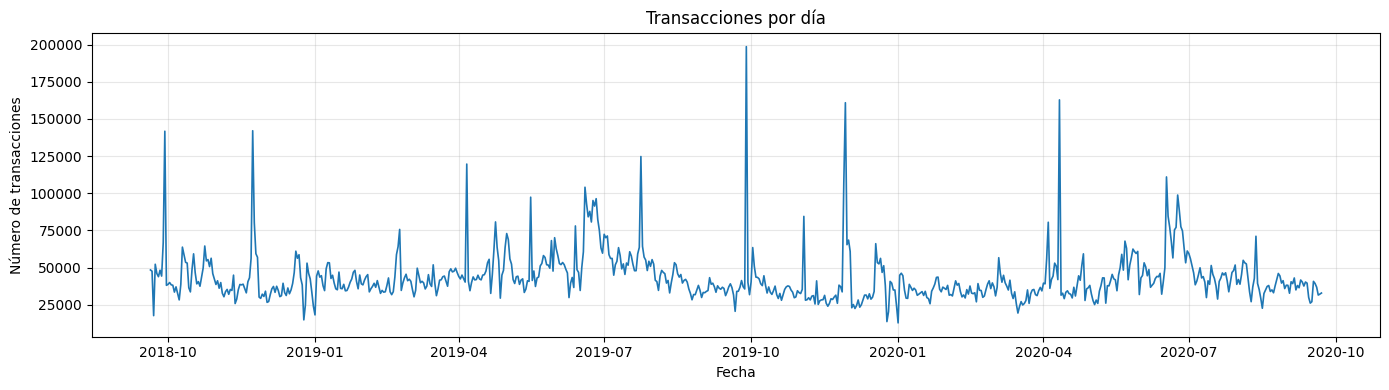

In [4]:
# Serie diaria completa de transacciones y gráfico de línea
from pyspark.sql.functions import to_date, col, count, min as _min, max as _max, explode, sequence, lit
import matplotlib.pyplot as plt

# Verificar existencia de df_transactions
if 'df_reload' not in globals():
    raise NameError("df_transactions no existe. Ejecuta la celda de carga de transacciones primero.")

# 1. Normalizar columna de fecha (ajusta nombre si difiere, por ejemplo 't_dat')
# Intenta detectar automáticamente el nombre de la columna de fecha
possible_date_cols = [c for c in df_reload.columns if c.lower() in ('t_dat','date','fecha','transaction_date')]
if not possible_date_cols:
    raise ValueError("No se encontró columna de fecha estándar (t_dat, date, fecha, transaction_date). Ajusta manualmente.")
DATE_COL = possible_date_cols[0]

# 2. Agregación diaria (solo Spark)
daily = (
    df_reload
    .withColumn("t_date", to_date(col(DATE_COL)))
    .groupBy("t_date")
    .agg(count(lit(1)).alias("transactions"))
)

# 3. Obtener min y max para crear rango completo
date_bounds = daily.agg(_min("t_date").alias("min_date"), _max("t_date").alias("max_date")).collect()[0]
min_date, max_date = date_bounds['min_date'], date_bounds['max_date']
if min_date is None or max_date is None:
    raise ValueError("No se pudieron determinar min/max de fechas.")

# 4. Generar todas las fechas y left join para rellenar días faltantes
full_dates = spark.sql(f"SELECT explode(sequence(to_date('{min_date}'), to_date('{max_date}'), interval 1 day)) AS t_date")
full_daily = (
    full_dates
    .join(daily, "t_date", "left")
    .fillna(0, subset=["transactions"])  # días sin transacciones -> 0
    .orderBy("t_date")
)

print("Rango de fechas:", min_date, "->", max_date, "Total días:", full_daily.count())
full_daily.show(5, truncate=False)

# 5. Convertir a pandas SOLO porque el número de días es pequeño; la agregación pesada ya está hecha en Spark
pdf_daily = full_daily.toPandas()

# 6. Graficar línea
plt.figure(figsize=(14,4))
plt.plot(pdf_daily['t_date'], pdf_daily['transactions'], linewidth=1.2)
plt.title('Transacciones por día')
plt.xlabel('Fecha')
plt.ylabel('Número de transacciones')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Nota: Si quieres mantenerte 100% en Spark (sin pandas), simplemente usa full_daily.show() o guarda Parquet:
# full_daily.write.mode('overwrite').parquet('data/daily_transactions')
# y grafica con otra herramienta externa.


Rangos del histograma (min=1.694915254237288e-05, max=0.5915254237288136), bin_width=0.02957542372881356


+---+--------------------+--------------------+--------+
|bin|left                |right               |count   |
+---+--------------------+--------------------+--------+
|0  |1.694915254237288E-5|0.029592372881355935|19854717|
|1  |0.029592372881355935|0.05916779661016949 |9977010 |
|2  |0.05916779661016949 |0.08874322033898305 |1594353 |
|3  |0.08874322033898306 |0.11831864406779663 |189878  |
|4  |0.11831864406779662 |0.14789406779661018 |102443  |
|5  |0.14789406779661018 |0.17746949152542374 |47628   |
|6  |0.17746949152542377 |0.20704491525423732 |2977    |
|7  |0.20704491525423732 |0.23662033898305088 |8893    |
|8  |0.23662033898305088 |0.26619576271186446 |6149    |
|9  |0.2661957627118644  |0.29577118644067796 |290     |
+---+--------------------+--------------------+--------+
only showing top 10 rows


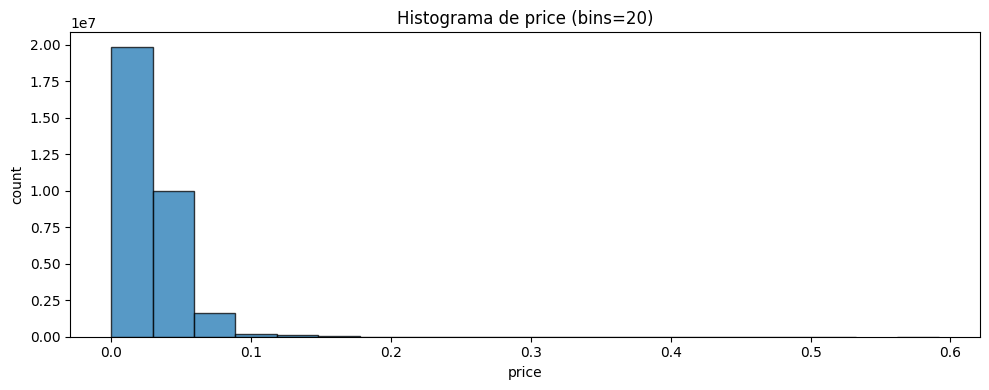

In [6]:
# Histograma de la columna "price" usando Spark (cálculo en Spark; graficado opcional)
from pyspark.sql.functions import col, floor, lit, when, min as _min, max as _max
import matplotlib.pyplot as plt


df_src = df_reload

# 2) Filtrar y tipar la columna
col_name = 'price'
df_price = (
    df_src
    .select(col(col_name).cast('double').alias('price'))
    .where(col('price').isNotNull())
)


# 3) Configurar número de bins (ajústalo según necesidad)
bins = 20
bins_minus_1 = int(bins - 1)

# 4) Calcular min y max en Spark
bounds = df_price.agg(_min('price').alias('min'), _max('price').alias('max')).collect()[0]
min_p, max_p = bounds['min'], bounds['max']
if min_p is None or max_p is None:
    raise ValueError("No se pudieron calcular min/max de price.")

# 5) Construir histograma en Spark
if max_p == min_p:
    # Todos los valores caen en un solo bin
    hist_df = (
        df_price
        .agg({'price': 'count'})
        .withColumnRenamed('count(price)', 'count')
        .withColumn('bin', lit(0).cast('int'))
        .withColumn('left', lit(float(min_p)))
        .withColumn('right', lit(float(max_p)))
    )
    bin_width = 0.0
else:
    bin_width = (max_p - min_p) / float(bins)
    hist_df = (
        df_price
        .withColumn('bin', floor((col('price') - lit(float(min_p))) / lit(bin_width)).cast('int'))
        .withColumn('bin', when(col('bin') < 0, lit(0))
                          .when(col('bin') >= lit(bins), lit(bins_minus_1))
                          .otherwise(col('bin')))
        .groupBy('bin')
        .count()
        .withColumn('left', lit(float(min_p)) + col('bin') * lit(bin_width))
        .withColumn('right', col('left') + lit(bin_width))
        .orderBy('bin')
    )

print(f"Rangos del histograma (min={min_p}, max={max_p}), bin_width={bin_width}")
hist_df.select('bin', 'left', 'right', 'count').orderBy('bin').show(10, truncate=False)

# 6) Graficar (opcional): convertimos SOLO el histograma (<= bins filas) a pandas
pdf_hist = hist_df.orderBy('bin').toPandas()
if not pdf_hist.empty:
    # Usamos el centro del bin para la barra y el ancho real del bin
    x = (pdf_hist['left'] + pdf_hist['right']) / 2.0
    widths = (pdf_hist['right'] - pdf_hist['left']).astype(float)
    plt.figure(figsize=(10, 4))
    plt.bar(x, pdf_hist['count'], width=widths, align='center', edgecolor='k', alpha=0.75)
    plt.xlabel('price')
    plt.ylabel('count')
    plt.title(f'Histograma de price (bins={bins})')
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos para graficar.")


Rangos del histograma (min=16.0, max=99.0), bin_width=2.7666666666666666


+---+------------------+------------------+-------+
|bin|left              |right             |count  |
+---+------------------+------------------+-------+
|0  |16.0              |18.766666666666666|262555 |
|1  |18.766666666666666|21.53333333333333 |2294907|
|2  |21.53333333333333 |24.299999999999997|3967589|
|3  |24.3              |27.066666666666666|4639820|
|4  |27.066666666666666|29.833333333333332|2585118|
|5  |29.833333333333332|32.6              |3045712|
|6  |32.6              |35.36666666666667 |1820596|
|7  |35.36666666666667 |38.13333333333333 |1209898|
|8  |38.13333333333333 |40.9              |736283 |
|9  |40.9              |43.666666666666664|1188627|
+---+------------------+------------------+-------+
only showing top 10 rows


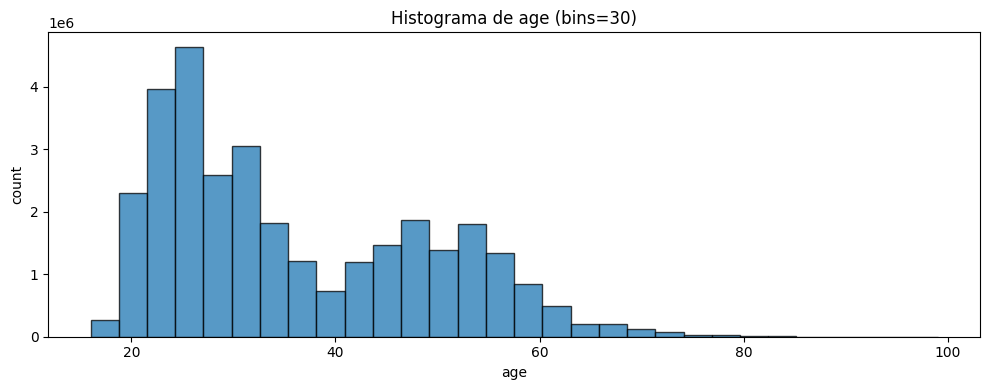

In [7]:

col_name = 'age'
df_age = (
    df_src
    .select(col(col_name).cast('double').alias('age'))
    .where(col('age').isNotNull())
)


# 3) Configurar número de bins (ajústalo según necesidad)
bins = 30
bins_minus_1 = int(bins - 1)

# 4) Calcular min y max en Spark
bounds = df_age.agg(_min('age').alias('min'), _max('age').alias('max')).collect()[0]
min_a, max_a = bounds['min'], bounds['max']
if min_a is None or max_a is None:
    raise ValueError("No se pudieron calcular min/max de age.")

# 5) Construir histograma en Spark
if max_a == min_a:
    # Todos los valores caen en un solo bin
    hist_df = (
        df_age
        .agg({'age': 'count'})
        .withColumnRenamed('count(age)', 'count')
        .withColumn('bin', lit(0).cast('int'))
        .withColumn('left', lit(float(min_a)))
        .withColumn('right', lit(float(max_a)))
    )
    bin_width = 0.0
else:
    bin_width = (max_a - min_a) / float(bins)
    hist_df = (
        df_age
        .withColumn('bin', floor((col('age') - lit(float(min_a))) / lit(bin_width)).cast('int'))
        .withColumn('bin', when(col('bin') < 0, lit(0))
                          .when(col('bin') >= lit(bins), lit(bins_minus_1))
                          .otherwise(col('bin')))
        .groupBy('bin')
        .count()
        .withColumn('left', lit(float(min_a)) + col('bin') * lit(bin_width))
        .withColumn('right', col('left') + lit(bin_width))
        .orderBy('bin')
    )

print(f"Rangos del histograma (min={min_a}, max={max_a}), bin_width={bin_width}")
hist_df.select('bin', 'left', 'right', 'count').orderBy('bin').show(10, truncate=False)

# 6) Graficar (opcional): convertimos SOLO el histograma (<= bins filas) a pandas
pdf_hist = hist_df.orderBy('bin').toPandas()
if not pdf_hist.empty:
    # Usamos el centro del bin para la barra y el ancho real del bin
    x = (pdf_hist['left'] + pdf_hist['right']) / 2.0
    widths = (pdf_hist['right'] - pdf_hist['left']).astype(float)
    plt.figure(figsize=(10, 4))
    plt.bar(x, pdf_hist['count'], width=widths, align='center', edgecolor='k', alpha=0.75)
    plt.xlabel('age')
    plt.ylabel('count')
    plt.title(f'Histograma de age (bins={bins})')
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos para graficar.")


Columnas categóricas detectadas: ['prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name', 'club_member_status', 'fashion_news_frequency', 'age']


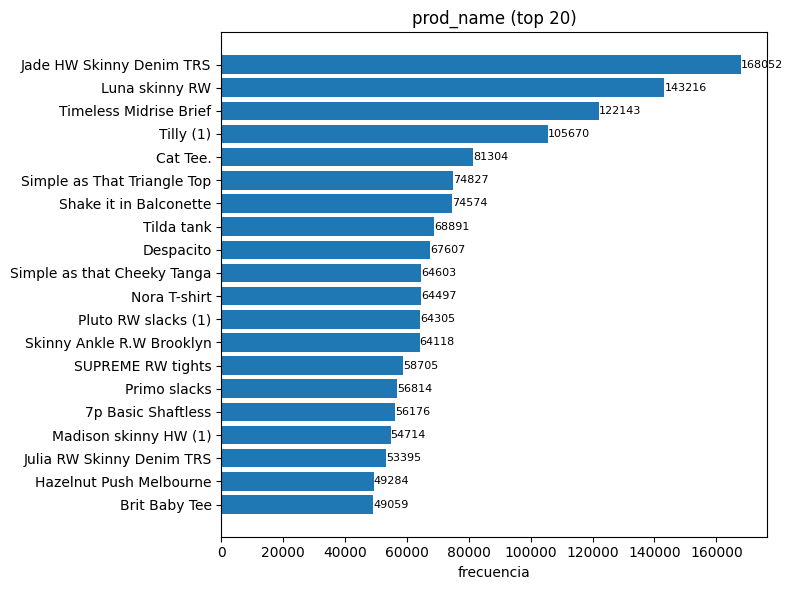

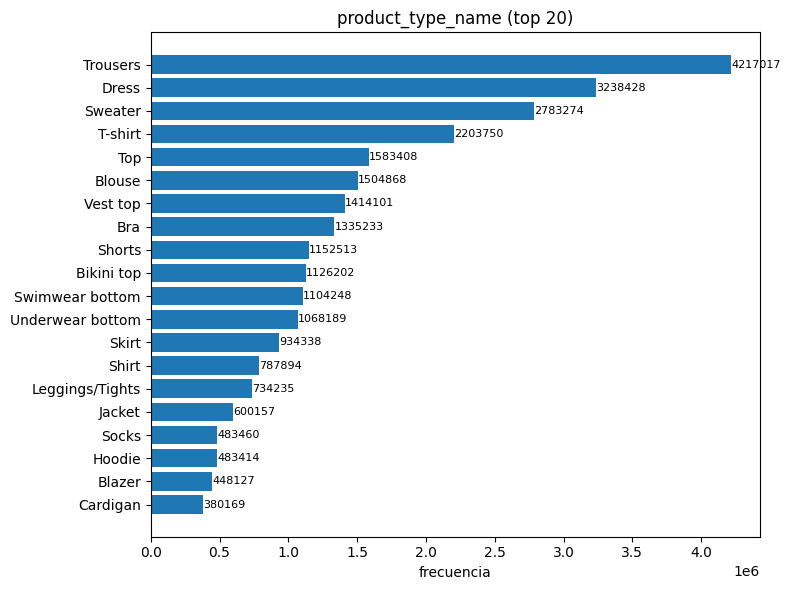

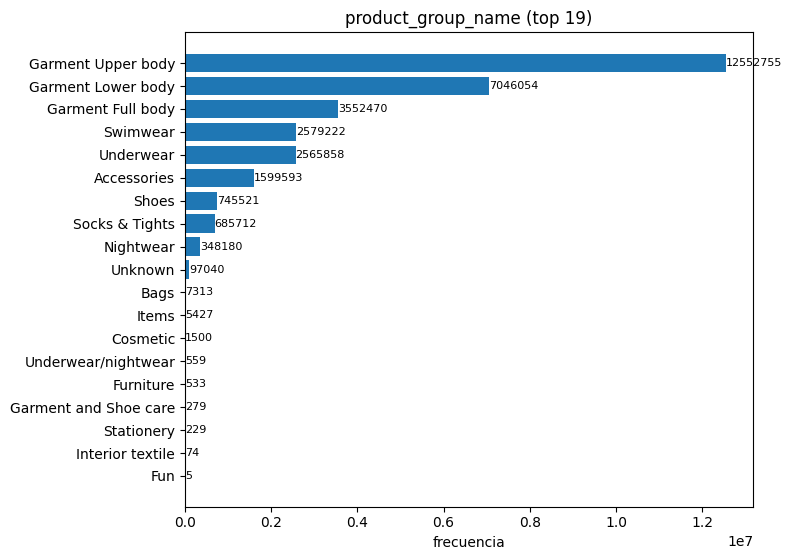

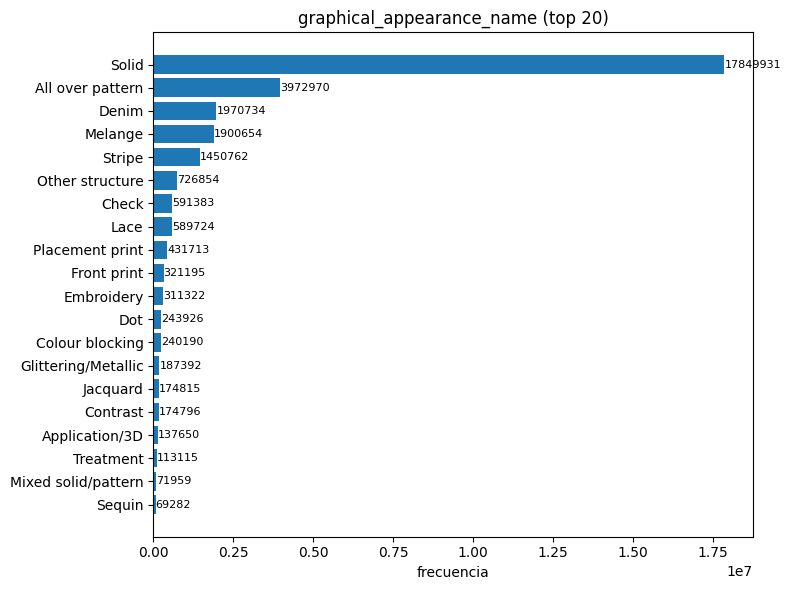

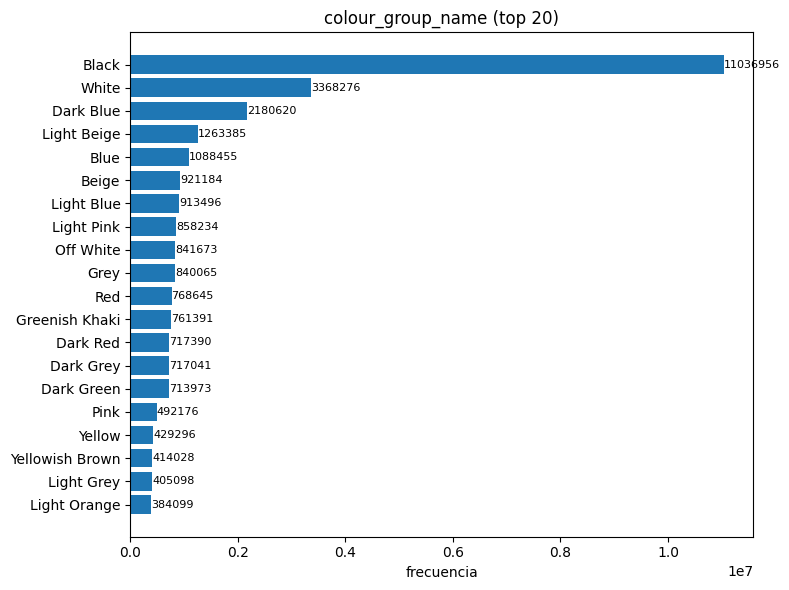

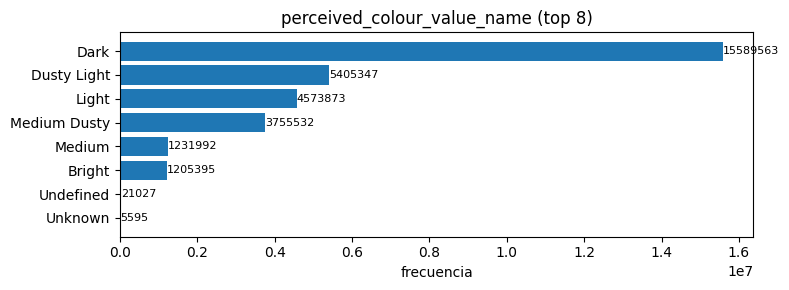

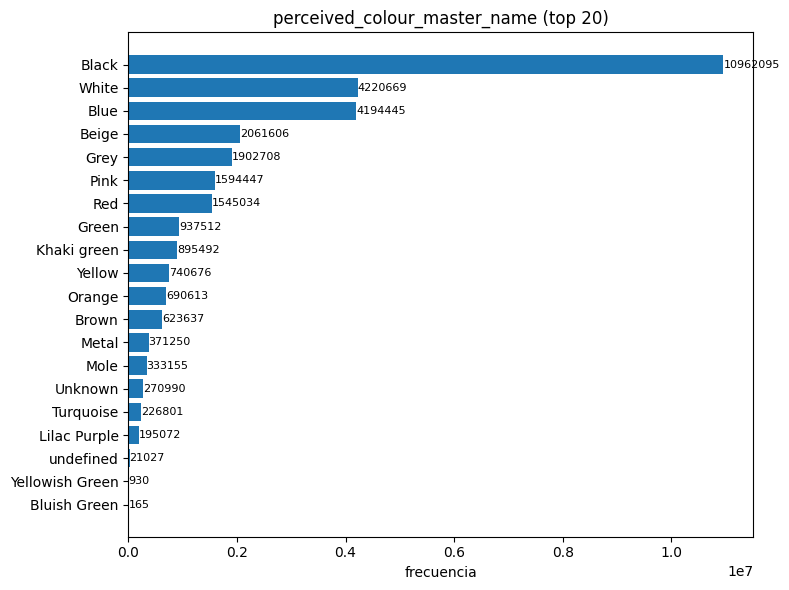

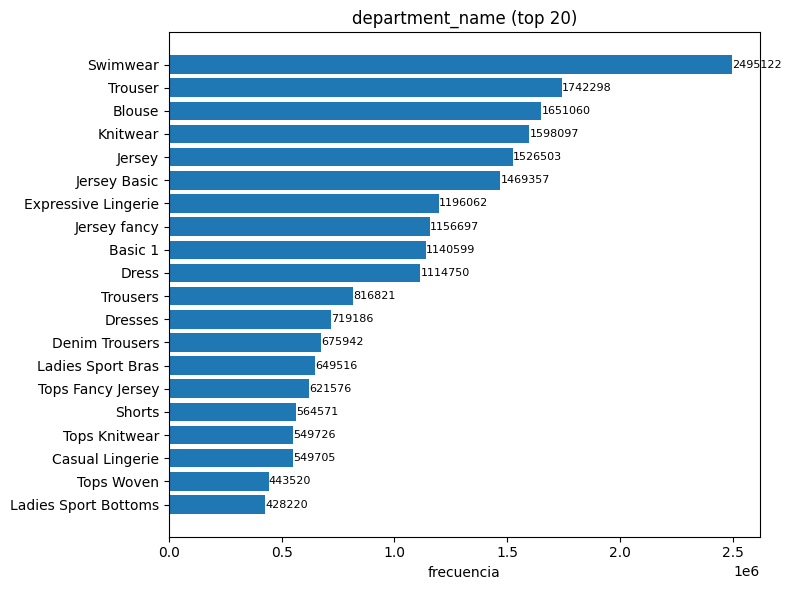

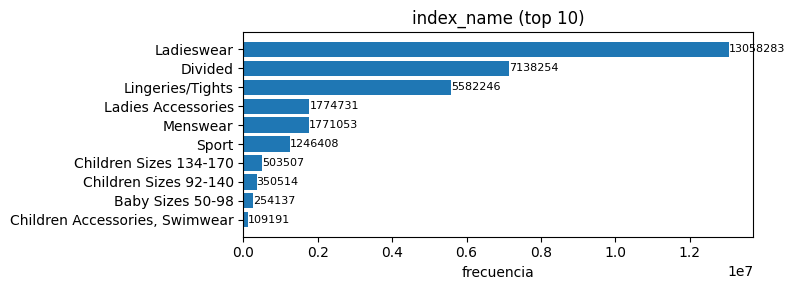

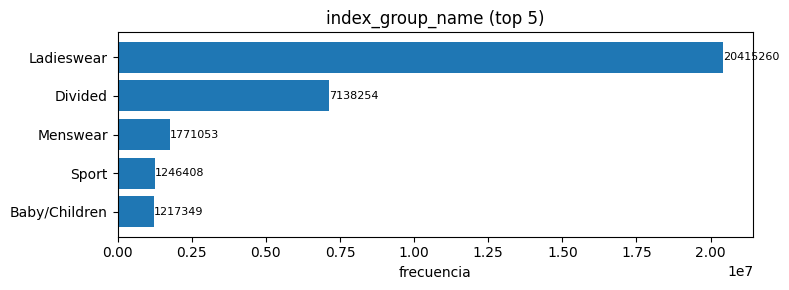

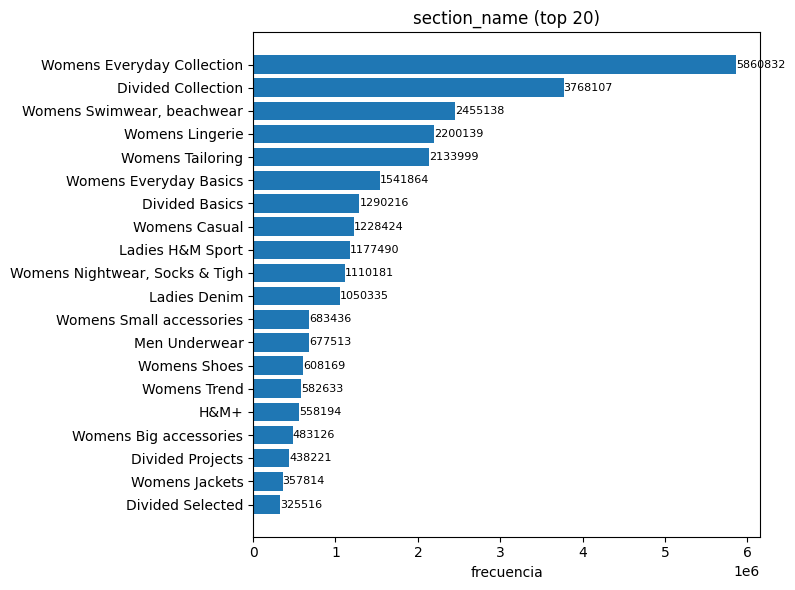

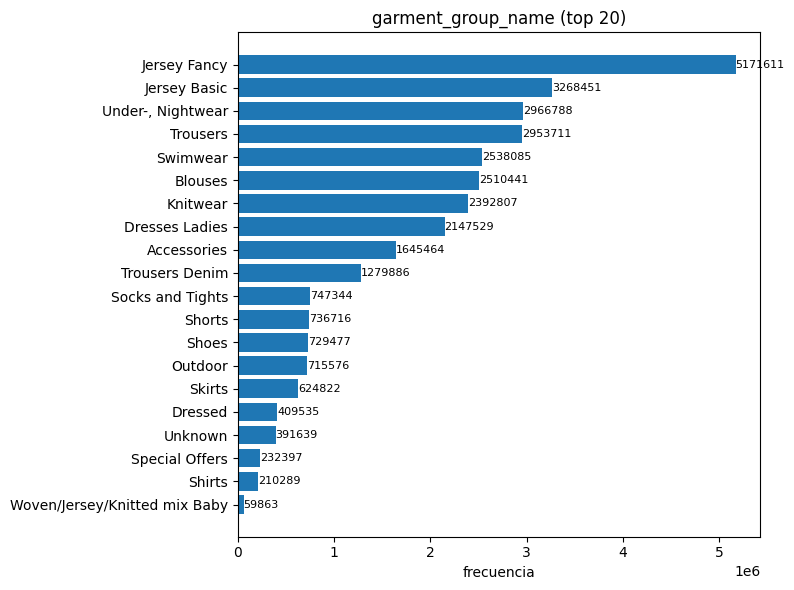

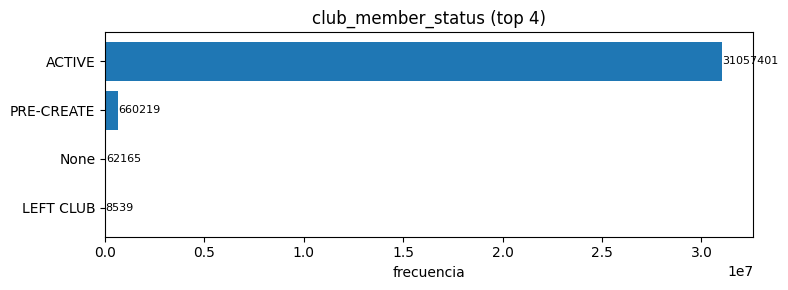

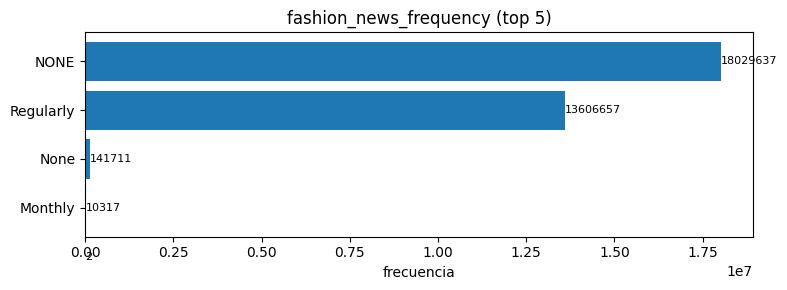

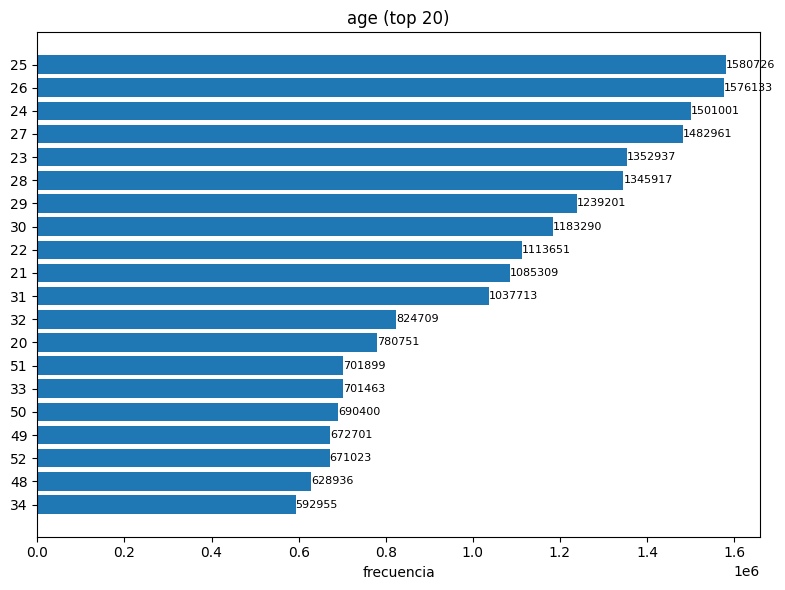

In [8]:
# Barras horizontales para variables categóricas usando Spark
# Reimplementación del loop pandas: para cada columna categórica -> value_counts -> barh.
# Nota: Spark no tiene dtype 'category'; detectamos columnas string, boolean y de baja cardinalidad numérica opcional.

from pyspark.sql.functions import col, count as _count
import matplotlib.pyplot as plt

df_cat_src = df_reload


# Parámetros
TOP_N = 20            # Máximo de categorías a mostrar por columna
MAX_CARDINALIDAD = 200  # Umbral para intentar graficar numéricas de baja cardinalidad

schema = df_cat_src.schema

categorical_cols = []
for field in schema.fields:
    dt = field.dataType.simpleString().lower()
    # Consideramos string y boolean directamente
    if dt in ('string', 'boolean'):  # boolean se mostrará como True/False
        categorical_cols.append(field.name)
    # Opcional: numéricas de baja cardinalidad (ej: pequeñas listas de códigos)
    elif dt in ('int', 'bigint', 'double', 'float', 'smallint'):  # puedes ajustar tipos
        # Estimar cardinalidad rápida (limit para evitar costo alto en datasets enormes)
        approx_count = (df_cat_src.select(field.name)
                        .where(col(field.name).isNotNull())
                        .agg(_count('*').alias('cnt'))
                        .collect()[0]['cnt'])
        # Si el total de filas es muy grande, no confundir cardinalidad con filas
        # Usamos distinct real pero con umbral de corte
        distinct_vals = (df_cat_src.select(field.name)
                         .distinct()
                         .limit(MAX_CARDINALIDAD + 1)
                         .count())
        if distinct_vals <= MAX_CARDINALIDAD:
            categorical_cols.append(field.name)

if not categorical_cols:
    print("No se encontraron columnas categóricas para graficar.")
else:
    print("Columnas categóricas detectadas:", categorical_cols)

for c in categorical_cols:
    # value_counts en Spark
    counts_df = (df_cat_src
                 .groupBy(c)
                 .agg(_count('*').alias('freq'))
                 .orderBy(col('freq').desc())
                 .limit(TOP_N))

    # Convertir a pandas SOLO el pequeño resultado (TOP_N filas)
    pdf = counts_df.toPandas()
    if pdf.empty:
        print(f"Columna {c}: sin datos (o todos nulos).")
        continue

    plt.figure(figsize=(8, max(3, 0.3 * len(pdf))))
    plt.barh(pdf[c].astype(str), pdf['freq'])
    plt.gca().invert_yaxis()  # categoría más frecuente arriba
    plt.title(f"{c} (top {len(pdf)})")
    plt.xlabel('frecuencia')
    for i, v in enumerate(pdf['freq']):
        plt.text(v, i, str(v), va='center', fontsize=8)
    plt.tight_layout()
    plt.show()

# Sugerencias:
# - Ajusta TOP_N si quieres más/menos categorías.
# - Si alguna columna tiene cardinalidad enorme no conviene graficarla completa.
# - Para guardar las tablas de frecuencias en Parquet: counts_df.write.parquet('data/freq_<col>')


In [9]:
#Quitar columnas no deseadas tras recarga de Parquet
cols_to_remove = {'prod_name','product_type_name','department_name','section_name'}
cols_keep = [c for c in df_reload.columns if c not in cols_to_remove]
df = df_reload.select(*cols_keep)

In [11]:
df.printSchema()
df.show(5, truncate=False)

root
 |-- t_dat: date (nullable = true)
 |-- price: double (nullable = true)
 |-- product_group_name: string (nullable = true)
 |-- graphical_appearance_name: string (nullable = true)
 |-- colour_group_name: string (nullable = true)
 |-- perceived_colour_value_name: string (nullable = true)
 |-- perceived_colour_master_name: string (nullable = true)
 |-- index_name: string (nullable = true)
 |-- index_group_name: string (nullable = true)
 |-- garment_group_name: string (nullable = true)
 |-- club_member_status: string (nullable = true)
 |-- fashion_news_frequency: string (nullable = true)
 |-- age: integer (nullable = true)



+----------+--------------------+------------------+-------------------------+-----------------+---------------------------+----------------------------+----------+----------------+------------------+------------------+----------------------+----+
|t_dat     |price               |product_group_name|graphical_appearance_name|colour_group_name|perceived_colour_value_name|perceived_colour_master_name|index_name|index_group_name|garment_group_name|club_member_status|fashion_news_frequency|age |
+----------+--------------------+------------------+-------------------------+-----------------+---------------------------+----------------------------+----------+----------------+------------------+------------------+----------------------+----+
|2019-10-02|0.042355932203389825|Garment Lower body|Solid                    |Black            |Dark                       |Black                       |Sport     |Sport           |Jersey Fancy      |NULL              |NULL                  |NULL|
|2019-10

In [13]:
#imputacion de nulos
# Perfil de nulos por columna (versión sencilla)
from pyspark.sql.functions import col, when, count as _count

df_null = df  # Cambia si tu DataFrame se llama distinto
total_rows = df_null.count()
print(f"Total filas: {total_rows}")

# Contar nulos en una sola pasada
null_exprs = [_count(when(col(c).isNull(), 1)).alias(c) for c in df_null.columns]
null_counts = df_null.select(*null_exprs).collect()[0].asDict()
dtypes = dict(df_null.dtypes)

print("columna | tipo | % nulos")
for c in df_null.columns:
    pct = (null_counts[c] / total_rows) * 100 if total_rows else 0
    print(f"{c} | {dtypes[c]} | {pct:.2f}%")

Total filas: 31788324


columna | tipo | % nulos
t_dat | date | 0.00%
price | double | 0.00%
product_group_name | string | 0.00%
graphical_appearance_name | string | 0.00%
colour_group_name | string | 0.00%
perceived_colour_value_name | string | 0.00%
perceived_colour_master_name | string | 0.00%
index_name | string | 0.00%
index_group_name | string | 0.00%
garment_group_name | string | 0.00%
club_member_status | string | 0.20%
fashion_news_frequency | string | 0.45%
age | int | 0.44%


In [14]:
#Imputa la edad con el promedio
from pyspark.sql.functions import avg
avg_age = df.select(avg(col('age'))).collect()[0][0]
df = df.na.fill({'age': avg_age})   

In [15]:
#imputa "club_member_status" y "fashion_news_frequency" con la moda
from pyspark.sql.functions import col, count as _count
def compute_mode(df, col_name):
    mode_row = (df.groupBy(col_name)
                   .agg(_count('*').alias('freq'))
                   .orderBy(col('freq').desc())
                   .first())
    return mode_row[0] if mode_row else None

club_member_status_mode = compute_mode(df, 'club_member_status')
fashion_news_frequency_mode = compute_mode(df, 'fashion_news_frequency')

df = df.na.fill({
    'club_member_status': club_member_status_mode,
    'fashion_news_frequency': fashion_news_frequency_mode
})
# Verificar que no queden nulos
df.select([_count(when(col(c).isNull(), 1)).alias(c)
              for c in ['age', 'club_member_status', 'fashion_news_frequency']]).show()

+---+------------------+----------------------+
|age|club_member_status|fashion_news_frequency|
+---+------------------+----------------------+
|  0|                 0|                     0|
+---+------------------+----------------------+



In [17]:
#guardar el DataFrame limpio como Parquet
output_parquet = "df_imputado.parquet"
(df.write
   .mode("overwrite")
   .option("compression", "snappy")
   .parquet(output_parquet))
print(f"DataFrame limpio guardado como Parquet en: {output_parquet}")
# Leer el Parquet limpio para verificar
df_check = spark.read.parquet(output_parquet)
print("Filas en el Parquet limpio:", df_check.count())
# Leer archivo Parquet limpio con Spark
import os
from pyspark.sql import SparkSession
# 1) Crear/obtener SparkSession
spark = SparkSession.builder.appName("LeerParquetLimpio").getOrCreate()
# 2) Ruta del Parquet limpio
parquet_path = "df_imputado.parquet"
if not os.path.exists(parquet_path):
    raise FileNotFoundError(f"No se encontró el archivo Parquet limpio en: {parquet_path}")
# 3) Lectura del Parquet limpio
df_reload_clean = spark.read.parquet(parquet_path)
# 4) Inspección rápida
print(f"Leyendo desde: {parquet_path}")
df_reload_clean.printSchema()
df_reload_clean.show(5, truncate=False)
# Verificar que no queden nulos en columnas imputadas
df_reload_clean.select([_count(when(col(c).isNull(), 1)).alias(c) for c in ['age', 'club_member_status', 'fashion_news_frequency']]).show()


DataFrame limpio guardado como Parquet en: df_imputado.parquet


Filas en el Parquet limpio: 31788324


25/11/12 02:22:34 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


Leyendo desde: df_imputado.parquet
root
 |-- t_dat: date (nullable = true)
 |-- price: double (nullable = true)
 |-- product_group_name: string (nullable = true)
 |-- graphical_appearance_name: string (nullable = true)
 |-- colour_group_name: string (nullable = true)
 |-- perceived_colour_value_name: string (nullable = true)
 |-- perceived_colour_master_name: string (nullable = true)
 |-- index_name: string (nullable = true)
 |-- index_group_name: string (nullable = true)
 |-- garment_group_name: string (nullable = true)
 |-- club_member_status: string (nullable = true)
 |-- fashion_news_frequency: string (nullable = true)
 |-- age: integer (nullable = true)

+----------+--------------------+------------------+-------------------------+-----------------+---------------------------+----------------------------+----------+----------------+------------------+------------------+----------------------+---+
|t_dat     |price               |product_group_name|graphical_appearance_name|colour_

+---+------------------+----------------------+
|age|club_member_status|fashion_news_frequency|
+---+------------------+----------------------+
|  0|                 0|                     0|
+---+------------------+----------------------+



In [18]:
import os, shutil, glob
out_dir_tmp = "data/_tmp_df_imputado_single"
final_name = "df_imputado_single.parquet"

# Limpia tmp previo
if os.path.exists(out_dir_tmp):
    shutil.rmtree(out_dir_tmp)

(df
 .coalesce(1)                # fuerza un solo archivo de salida
 .write
 .mode("overwrite")
 .option("compression", "snappy")
 .parquet(out_dir_tmp))

# Mover el part-*.parquet al nombre final
part_file = glob.glob(os.path.join(out_dir_tmp, "part-*.parquet"))[0]
if os.path.exists(final_name):
    os.remove(final_name)
shutil.move(part_file, final_name)
shutil.rmtree(out_dir_tmp)
print(f"Parquet único creado: {final_name}")

Parquet único creado: df_imputado_single.parquet


In [22]:
from IPython.display import FileLink, display, HTML
import os

path_file = "/workspaces/Final-procesos-organizacionales/notebooks/df_imputado_single.parquet"
assert os.path.exists(path_file), f"No existe: {path_file}"

# Enlace clicable en la salida de la celda
display(FileLink(path_file, result_html_prefix="Haz clic para descargar: "))

# Fallback HTML explícito
display(HTML(f"<a href='file://{path_file}' download>Descargar df_imputado_single.parquet</a>"))

# Si tu entorno no permite el clic, usa el Explorador de VS Code:
# - Abre notebooks/
# - Clic derecho sobre df_imputado_single.parquet -> Download

/workspaces/Final-procesos-organizacionales/notebooks/df_imputado_single.parquet

In [ ]:
# Descarga directa vía HTTP local (sin dependencias externas)
# - Inicia un servidor en el puerto 8000
# - URL de descarga: http://127.0.0.1:8000/download
# En VS Code/Codespaces: revisa la pestaña “Ports” (puerto 8000) y ábrelo en el navegador.

import os
import threading
from http.server import HTTPServer, BaseHTTPRequestHandler

# Rutas candidatas (ajusta si es necesario)
candidates = [
    "notebooks/df_imputado_single.parquet",
    "/workspaces/Final-procesos-organizacionales/notebooks/df_imputado_single.parquet",
    "df_imputado_single.parquet",
]
file_path = next((p for p in candidates if os.path.exists(p)), None)
assert file_path, "No se encontró df_imputado_single.parquet en rutas conocidas."

class SingleFileHandler(BaseHTTPRequestHandler):
    file_path = file_path
    def do_GET(self):
        if self.path not in ("/", "/download"):
            self.send_response(404); self.end_headers()
            self.wfile.write(b"Not found"); return
        fs = os.path.getsize(self.file_path)
        self.send_response(200)
        self.send_header("Content-Type", "application/octet-stream")
        self.send_header("Content-Length", str(fs))
        self.send_header("Content-Disposition", 'attachment; filename="df_imputado_single.parquet"')
        self.end_headers()
        with open(self.file_path, "rb") as f:
            while True:
                chunk = f.read(1024 * 1024)
                if not chunk: break
                self.wfile.write(chunk)

# Lanza el servidor en background (0.0.0.0 para permitir reenvío de puertos)
PORT = 8000
httpd = HTTPServer(("0.0.0.0", PORT), SingleFileHandler)
thread = threading.Thread(target=httpd.serve_forever, daemon=True)
thread.start()

print("Servidor activo.")
print(f"Descarga el archivo en:")
print(f"  http://127.0.0.1:{PORT}/download")
print("\nSi estás en VS Code remoto/Codespaces:")
print("- Abre la pestaña 'Ports', busca el puerto 8000 y haz 'Open in Browser'.")
print("- Luego navega a /download para iniciar la descarga.")

Servidor activo.
Descarga el archivo en:
  http://127.0.0.1:8000/download

Si estás en VS Code remoto/Codespaces:
- Abre la pestaña 'Ports', busca el puerto 8000 y haz 'Open in Browser'.
- Luego navega a /download para iniciar la descarga.


127.0.0.1 - - [12/Nov/2025 03:27:38] "GET / HTTP/1.1" 200 -
